In [ ]:
# %tensorflow_version 2.2
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda, MaxPooling2D, Dropout
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
# from efficientnet.keras import EfficientNetB4 as ENetB4
# from keras.applications import EfficientNetB4 as ENetB4
from keras_preprocessing.image import ImageDataGenerator
from scipy import pi


2.3.0


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
!unzip "/content/gdrive/My Drive/Sem2/Project/train.zip" -d "./"

In [ ]:
!unzip "/content/gdrive/My Drive/Sem2/Project/test.zip" -d "./"

In [ ]:
trainDF = pd.read_csv("/content/gdrive/My Drive/Sem2/Project/train.txt", sep=" ", header=None)
trainDF.columns = ['Images', 'SteeringAngle'] 
trainDF['SteeringAngle'] = trainDF['SteeringAngle'] * (pi / 180)

testDF = pd.read_csv("/content/gdrive/My Drive/Sem2/Project/test.txt", sep=" ", header=None)
testDF.columns = ['Images', 'SteeringAngle'] 
testDF['SteeringAngle'] = testDF['SteeringAngle'] * (pi / 180)

datagen = ImageDataGenerator(
            rescale=1./255,
            zca_whitening=True,
            rotation_range=5,
            zoom_range=[0.1, 0.5],
            height_shift_range=[0.1,0.3],
            brightness_range=[0.55,1.0],
            fill_mode='nearest',
            validation_split=0.25)

trainData = trainDF.shape[0] * 0.75
valData = trainDF.shape[0] * 0.25
# print(trainData, valData)

test_datagen = ImageDataGenerator(rescale=1./255)

BatchSize = 98

train_generator=datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/content/train/",
x_col="Images",
y_col="SteeringAngle",
subset="training",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))

validation_generator = datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/content/train/",
x_col="Images",
y_col="SteeringAngle",
subset="validation",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 27342 validated image filenames.
Found 9113 validated image filenames.


In [ ]:
def architecture(width, height, depth):

    model = tf.keras.applications.EfficientNetB4(weights='imagenet', include_top=False, input_shape=(height, width, depth))
    return model

model = architecture(width=200, height=100, depth=3)
print (model.summary())

71688192/71686520 [==============================] - 1s 0us/step
Model: "efficientnetb4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 200, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 100, 200, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 100, 200, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 101, 201, 3)  0           normalization[0][0]              
____________________

In [ ]:
def ENetB4_FT(width, height, depth):

    conv_base = tf.keras.applications.EfficientNetB4(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    model = models.Sequential()
    model.add(conv_base)
    conv_base.trainable = False
    model.add(layers.Flatten())

    model.add(Dense(1164, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))    
    model.add(Dense(1, activation='linear'))

    return model


71688192/71686520 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
279/279 [==============================] - ETA: 0s - loss: 0.2295
Epoch 00001: saving model to /content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_FT/ENetB4_FT_weights.01-0.66.h5
279/279 [==============================] - 363s 1s/step - loss: 0.2295 - val_loss: 0.6586
Epoch 2/10
279/279 [==============================] - ETA: 0s - loss: 0.2164
Epoch 00002: saving model to /content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_FT/ENetB4_FT_weights.02-0.66.h5
279/279 [==============================] - 356s 1s/step - loss: 0.2164 - val_loss: 0.6586
Epoch 3/10
279/279 [==============================] - ETA: 0s - loss: 0.2129
Epoch 00003: saving model to /content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_FT/ENetB4_FT_weights.03-0.66.h5
279/279 [==============================] - 346s 1s/step - loss: 0.2129 - val_loss: 0.6586
Epoch 4/10
279/279 [==============================] - ETA: 0s - loss: 0.2115
Epoch 00004: saving model to /content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_FT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


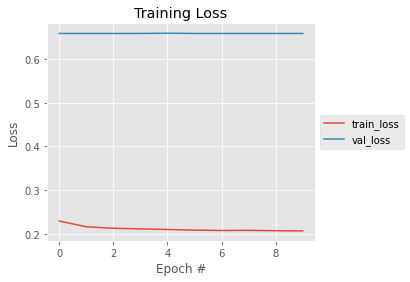

In [ ]:
from keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 10

model = ENetB4_FT(width=200, height=100, depth=3)

filepath =  "/content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_DA/ENetB4_DA_weights.04-0.66.h5"

model.load_weights(filepath)

conv_base = tf.keras.applications.EfficientNetB4(weights='imagenet', include_top=False, input_shape=(100, 200, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block7a_expand_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adadelta(lr=1e-3), loss="mse")

filepath1 = "/content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_FT/ENetB4_FT_weights.{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath1, verbose=1)

history = model.fit(
                train_generator,
                steps_per_epoch=round(trainData/BatchSize),
                epochs=NUM_EPOCHS,
                validation_data=validation_generator,
                validation_steps=round(valData/BatchSize),
                callbacks=[checkpoint])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

model.save_weights(filepath)

In [ ]:
from keras.models import load_model
from sklearn.metrics import mean_absolute_error

test_generator=test_datagen.flow_from_dataframe(
dataframe=testDF,
directory="/content/test/",
x_col="Images",
# y_col="SteeringAngle",
y_col=None,    
batch_size=100,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,200))

filepath = "/content/gdrive/My Drive/Sem2/Project/ENetB4/ENetB4_FT/ENetB4_FT_weights.10-0.66.h5"

model.load_weights(filepath)


predictions = model.predict(test_generator)

MAE = mean_absolute_error(testDF.iloc[:, -1], predictions)
print(MAE)

Found 8951 validated image filenames.
0.21957541054380966
